Importing Essential Libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score
from sklearn.ensemble import RandomForestClassifier

Reading CSV Files

In [59]:
train_features = pd.read_csv('training_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')
test_features = pd.read_csv('test_set_features.csv')

In [60]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [61]:
train_features.shape

(26707, 36)

In [62]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   xyz_vaccine       26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [63]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26623 non-null  float64
 2   xyz_knowledge                26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_xyz              24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [64]:
train_features.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [65]:
train_features.describe(include=object)

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [66]:
train_features.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

Separating the numerical and categorical feature columns for the easiness to fill Nan values

In [67]:
df_numerical_features = train_features.select_dtypes(exclude='object')
df_categorical_features = train_features.select_dtypes(include='object')

Filling numerical values with the median of the respective columns

In [68]:
df_numerical_features=df_numerical_features.fillna(df_numerical_features.median())

In [69]:
df_numerical_features.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

Filling all the categorical values with the most frequent value in the respective columns

In [70]:
df_categorical_features = df_categorical_features.apply(lambda x: x.fillna(x.mode()[0]))

In [71]:
df_categorical_features.isnull().sum()

age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

Making train_features a complete dataset with no Nan values.

In [72]:
train_features = pd.concat([df_numerical_features, df_categorical_features], axis=1)

In [73]:
train_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,fcxhlnwr,xtkaffoo
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",fcxhlnwr,xtkaffoo
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb


In [74]:
train_features.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_ow

Training the Model.

In [75]:
#Selecting the categorical features separately for Encoding
categorical_features = train_features.select_dtypes(include=['object']).columns
numeric_features = train_features.select_dtypes(include=['int64', 'float64']).columns

In [76]:
X = train_features.drop('respondent_id', axis=1)
y = train_labels[['xyz_vaccine', 'seasonal_vaccine']]

In [77]:
X = pd.get_dummies(train_features, columns=categorical_features, drop_first=True)

Splitting the data into train and test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creating two models one for seasonal_vaccine and other for xyz_vaccine

In [79]:
model_xyz = LogisticRegression()
model_seasonal = LogisticRegression()

In [80]:
model_xyz.fit(X_train, y_train['xyz_vaccine'])
model_seasonal.fit(X_train, y_train['seasonal_vaccine'])

c:\Users\COBUY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\COBUY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LogisticRegression()

Testing Model

In [100]:
# accuracy on xyz_training data
X_train_prediction = model_xyz.predict(X_train)
training_data_accuracy = accuracy_score(y_train['xyz_vaccine'], X_train_prediction)

In [101]:
print('Accuracy on xyz_training data = ', training_data_accuracy)

Accuracy on xyz_training data =  0.82340276152586


In [102]:
# accuracy on seasonal_training data
X_train_prediction = model_seasonal.predict(X_train)
training_data_accuracy = accuracy_score(y_train['seasonal_vaccine'], X_train_prediction)

In [103]:
print('Accuracy on seasonal_training data = ', training_data_accuracy)

Accuracy on seasonal_training data =  0.7388251813714019


In [81]:
# Predict probabilities on validation set
y_val_pred_xyz = model_xyz.predict_proba(X_test)[:, 1]
y_val_pred_seasonal = model_seasonal.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc_val_xyz = roc_auc_score(y_test['xyz_vaccine'], y_val_pred_xyz)
roc_auc_val_seasonal = roc_auc_score(y_test['seasonal_vaccine'], y_val_pred_seasonal)

print(f'ROC AUC (Validation - xyz_vaccine): {roc_auc_val_xyz:.4f}')
print(f'ROC AUC (Validation - seasonal_vaccine): {roc_auc_val_seasonal:.4f}')


ROC AUC (Validation - xyz_vaccine): 0.7802
ROC AUC (Validation - seasonal_vaccine): 0.8098


Ploting Curve ROC - AUC curves

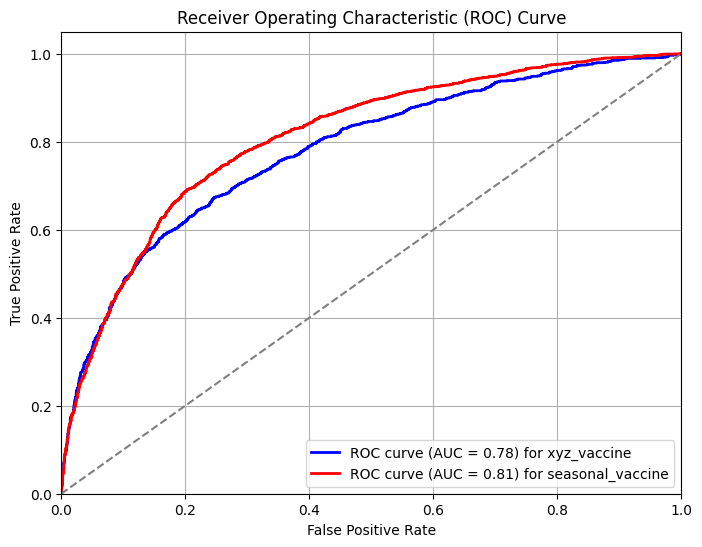

In [82]:

y_true_xyz = y_test['xyz_vaccine']
y_true_seasonal = y_test['seasonal_vaccine']

# Calculate ROC curve and ROC AUC score for xyz_vaccine
fpr_xyz, tpr_xyz, _ = roc_curve(y_true_xyz, y_val_pred_xyz)
roc_auc_xyz = roc_auc_score(y_true_xyz, y_val_pred_xyz)

# Calculate ROC curve and ROC AUC score for seasonal_vaccine
fpr_seasonal, tpr_seasonal, _ = roc_curve(y_true_seasonal, y_val_pred_seasonal)
roc_auc_seasonal = roc_auc_score(y_true_seasonal, y_val_pred_seasonal)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xyz, tpr_xyz, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_xyz:.2f}) for xyz_vaccine')
plt.plot(fpr_seasonal, tpr_seasonal, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc_seasonal:.2f}) for seasonal_vaccine')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Predicting Probablities for two Vaccines Seasonal and Xyz

In [83]:
# Preprocess test data
test_features[numeric_features]=test_features[numeric_features].fillna(test_features[numeric_features].median())
test_features = pd.get_dummies(test_features, columns=categorical_features, drop_first=True)

# Predict probabilities on test set
test_predictions_xyz = model_xyz.predict_proba(test_features)[:, 1]
test_predictions_seasonal = model_seasonal.predict_proba(test_features)[:, 1]


In [84]:
# Prepare submission dataframe
submission = pd.DataFrame({
    'respondent_id': test_features['respondent_id'],
    'xyz_vaccine': test_predictions_xyz,
    'seasonal_vaccine': test_predictions_seasonal
})

# Save submission to CSV
submission.to_csv('Prediction_vaccine_submission.csv', index=False)
